In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [3]:
!pip install pyarrow

In [4]:
df.shape

(3066766, 19)

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [6]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])


In [7]:
df['duration'] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]

In [8]:
df['duration_min'] = df['duration'].dt.total_seconds()/60

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,duration_min
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50,10.833333


In [10]:
df['duration_min'].std()

np.float64(42.59435124195458)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='duration_min'>

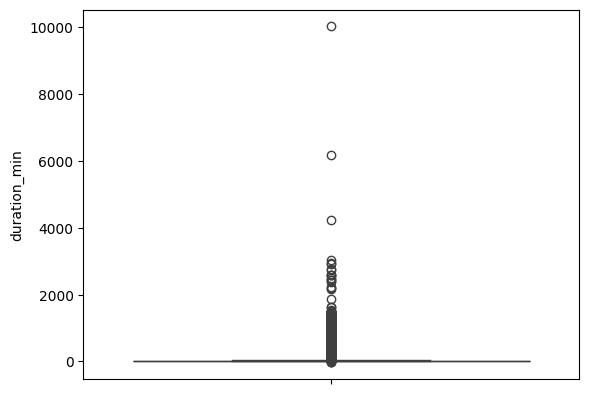

In [12]:
sns.boxplot(df['duration_min'])

In [13]:
initial = len(df)

In [14]:
 filtered_df = df[(df['duration_min'] >= 1 ) & (df['duration_min'] <= 60)]

In [15]:
final = len(filtered_df)

In [16]:
fraction_left = final/initial*100
print(f'Fraction of records left after removing outliers are {fraction_left}')

Fraction of records left after removing outliers are 98.1220282212598


In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = True)
sparse_matrix = encoder.fit_transform(filtered_df[['PULocationID','DOLocationID']])


In [ ]:
list_of_dicts = filtered_df.astype({"PULocationID": str, "DOLocationID": str}).to_dict(orient="records")
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=False)
feature_matrix = vectorizer.fit_transform(list_of_dicts)
feature_matrix

In [ ]:
df.columns